En este cuaderno se implementan algunas funciones y algunos segmentos de código que pueden ser útiles para el desarrollo del [Taller 1](https://github.com/andresgm/Herramientas-Computacionales/tree/master/02_taller01) del curso.  

Comienzo importando dos librerías que no habíamos usado hasta ahora en el curso.

La librería os nos permite interactuar con algunas funcionalidades del sistema operativo. La vamos a utilizar para construir rutas a archivos que sean independientes del sistema operativo utilizado.

La librería pandas es muy utilizada para análisis de datos. En primera instancia implementa una estructura de datos llamada 'dataframe' similar a una hoja de calculo. Adicionalmente, implementa numerosas funciones para realizar calculos estadísticos sobre estas estructuras.

In [2]:
import os
import pandas as pd

Tradicional comando para facilitar el cálculo interactivo.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


En la siguiente celda muestro cómo podemos leer los datos desde archivos .csv a pandas dataframes.

Acá se puede apreciar el uso de *os.path.join* para la creación de las rutas de los archivos. 

Noten la configuración de la función pd.read_csv. El parámetro sep=';' determina que las variables están separadas por punto y coma y no por coma. El encoding='latin-1' permite leer correctamente caracteres como la 'ñ'.

In [4]:
pwd

'/home/nbuser/library/02_Taller1_EFICC'

In [5]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Barranquilla'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',encoding='latin-1')

In [6]:
serie_pd.head

<bound method NDFrame.head of         AÑO  MES  DIA  HORA       IDEAM
0      2010    1    1     0    0.000000
1      2010    1    1     1    0.000000
2      2010    1    1     2    0.000000
3      2010    1    1     3    0.000000
4      2010    1    1     4    0.000000
5      2010    1    1     5    0.000000
6      2010    1    1     6    1.063264
7      2010    1    1     7   23.391813
8      2010    1    1     8  153.110048
9      2010    1    1     9  344.497608
10     2010    1    1    10  535.885167
11     2010    1    1    11  676.236045
12     2010    1    1    12  753.854333
13     2010    1    1    13  765.550239
14     2010    1    1    14  696.438065
15     2010    1    1    15  589.048379
16     2010    1    1    16  425.305688
17     2010    1    1    17  223.285486
18     2010    1    1    18   38.277512
19     2010    1    1    19    0.000000
20     2010    1    1    20    0.000000
21     2010    1    1    21    0.000000
22     2010    1    1    22    0.000000
23     201

En la siguiente celda, implemento dos funciones útiles para realizar algunos de los cálculo necesarios para el cálculo de la ENFICC como está determinado en la [Resolución CREG 071 de 2006](http://apolo.creg.gov.co/Publicac.nsf/1c09d18d2d5ffb5b05256eee00709c02/4f8f33924247ce4a0525785a007a6d74?OpenDocument).  

La función *ghi_mensual* calcula la energía total en $kWh/m^2$ para cada mes en la serie de datos. Con esta información, la función *ghi_dia* calcula el promedio diario de cada mes.

In [7]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

En la siguiente celda se utilizan las dos funciones definidas previamente y se organizan los valores promedio mensuales.

In [8]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

A continuación hago una sencilla gráfica de la distribución de energía promedio mensual.

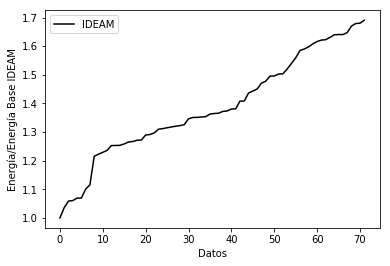

In [9]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos = range(len(datos_IDEAM))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'valledupar_IDEAM.png'), dpi=600)

Finalmente, se calcula el percentil correspondiente al valor de la ENFICC que se desea calcular.

In [10]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  4.16059025817


In [11]:
list(ghi_mensual_loc)

['AÑO', 'MES', 'DIAS', 'GHImes']